### DIP - LAB 2

#### Parth Sood
#### 21BCP252
#### Date: 19/02/2024

### <i>Histogram Equalization </i>

In [2]:
from PIL import Image
import os
import numpy as np
import matplotlib.pyplot as plt

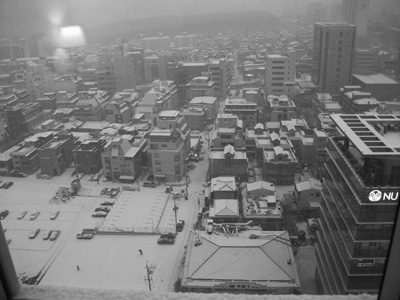

In [4]:
img_path = "D:\DIP_Lab\Lab_2\equil\img3.jpg"
image = Image.open(img_path)
 
image

In [5]:
image = image.convert('L')
image = np.asarray(image)

> Theoery behind histogram equalization
- Histogram is a graph that shows the frequency distribution of pixel intensities in an image.
- Histogram equalization is a method in image processing of contrast adjustment using the image's histogram.
- This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. 
- It attempts to reduce the contrast by making the low intensity levels more visible and the high intensity levels less visible. 
- It attempts to reduce the contrast by making the brightness of darker pixels appear brighter and the brightness of brighter pixels appear darker. It attempts to reduce the contrast by making the darker regions appear brighter and the lighter regions appear darker. 


#### Steps we follow to achieve this
1) calculating the probability of each pixel value .i.e. p(rk) or simply p(k) also called as PDF (probability density function). p(k) = n(k) / N where n(k) is the count of pixel value k and N is the total number of pixels in the image
2) calculating the cumulative distribution function (CDF) of the pixel values. CDF(k) = sum(p(i)) where i = 0 to k
3) creating the equalized image


> Calculating the histogram of the image

```python

 
#### Parameters:
- `image`: The input image for which the histogram needs to be calculated.

#### Functionality:
1. Initializes a histogram array with 256 bins, each initialized to zero.
2. Converts the input image to a NumPy array of unsigned integers (`np.uint8`) to ensure compatibility with the histogram computation.
3. Flattens the image array into a 1D array of pixels.
4. Uses NumPy's `bincount` function to efficiently compute the histogram. This function counts occurrences of each pixel value in the flattened image array and stores them in the histogram array.
5. The `minlength` parameter ensures that the histogram array has at least 256 bins, even if some pixel values are not present in the image.
6. Returns the computed histogram array.

#### Returns:
- `histogram`: The computed histogram of the input image, represented as an array with 256 bins.


In [6]:
import numpy as np

def calculate_histogram(image):
    histogram = np.zeros(256, dtype=int)
    image = np.asarray(image, dtype=np.uint8)   

     image_flat = image.flatten()

    # Use NumPy's vectorized operations for efficiency
    histogram = np.bincount(image_flat, minlength=256)

    return histogram

histogram = calculate_histogram(image)

In [7]:
histogram


array([   0,    0,    0,    0,    1,    7,   19,   22,   36,   30,   36,
         23,   15,   24,   26,   27,   29,   21,   17,   17,   15,    8,
         15,   15,    9,   16,   18,   21,   42,   64,   82,   99,  113,
        121,  164,  190,  211,  241,  239,  235,  255,  282,  282,  281,
        282,  304,  296,  293,  344,  321,  357,  412,  444,  430,  469,
        497,  515,  514,  562,  524,  462,  453,  489,  473,  459,  500,
        528,  491,  545,  583,  573,  533,  597,  611,  626,  615,  679,
        748,  844,  842,  853,  947,  870,  866,  827,  828,  759,  770,
        744,  812,  806,  790,  776,  786,  842,  861,  870,  899,  947,
        942,  905,  866,  872,  866,  864,  888,  849,  870,  867,  856,
        823,  877,  860,  809,  810,  905,  862,  820,  882,  881,  902,
        869,  955,  863,  821,  773,  737,  725,  758,  760,  752,  809,
        830,  821,  856,  820,  884,  859,  900,  866,  899, 1050,  963,
       1096, 1147, 1132, 1092, 1058, 1095, 1067, 10

> Plotting the histogram


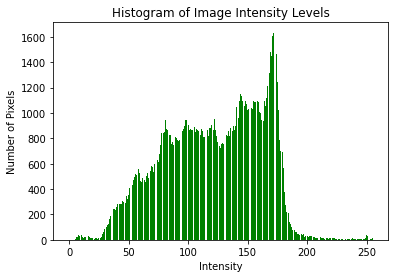

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def plot_hist(hist):
    intensity_levels = np.arange(256)
    plt.bar(intensity_levels, hist, color='green')
    plt.xlabel('Intensity')
    plt.ylabel('Number of Pixels')
    plt.title('Histogram of Image Intensity Levels')
    plt.show()
plot_hist(histogram)

> Calculating the Probability Density Function and Cumulative Distribution Function

```python

In [9]:
def calculate_pdf(histogram):
    
    pdf = np.round(histogram / np.sum(histogram),3)
    return pdf

In [10]:
def calculate_cdf(histogram):
        pdf = calculate_pdf(histogram)  # Calculate PDF using your existing function

        cdf = np.zeros_like(pdf)  # Initialize CDF array with zeros

  # Accumulate PDF values to calculate CDF
        for i in range(1, len(pdf)):
                cdf[i] = cdf[i - 1] + pdf[i]

        return cdf

In [11]:
pdf_hist = calculate_pdf(histogram)
cdf_hist = calculate_cdf(histogram)

In [109]:
# pdf_hist
cdf_hist

array([0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.008,
       0.01 , 0.012, 0.014, 0.016, 0.018, 0.02 , 0.022, 0.024, 0.026,
       0.029, 0.031, 0.033, 0.036, 0.039, 0.042, 0.045, 0.049, 0.053,
       0.057, 0.061, 0.065, 0.069, 0.074, 0.078, 0.082, 0.086, 0.09 ,
       0.094, 0.098, 0.102, 0.106, 0.11 , 0.115, 0.12 , 0.125, 0.129,
       0.134, 0.139, 0.144, 0.149, 0.155, 0.161, 0.168, 0.175, 0.182,
       0.19 , 0.197, 0.204, 0.211, 0.218, 0.224, 0.23 , 0.236, 0.243,
       0.25 , 0.257, 0.263, 0.27 , 0.277, 0.284, 0.291, 0.298, 0.306,
       0.314, 0.322, 0.329, 0.336, 0.343, 0.35 , 0.357, 0.364, 0.371,
       0.378, 0.385, 0.392, 0.399, 0.406, 0.413, 0.42 , 0.428, 0.435,
       0.442, 0.449, 0.456, 0.464, 0.471, 0.479, 0.486, 0.493, 0.499,
       0.505, 0.511,

In [12]:
equ_hist={}
for i in range(len(cdf_hist)):
    equ_hist[i] = round(cdf_hist[i]*255)
equ_hist

{0: 0,
 1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0,
 29: 0,
 30: 1,
 31: 1,
 32: 1,
 33: 1,
 34: 2,
 35: 2,
 36: 3,
 37: 3,
 38: 4,
 39: 4,
 40: 5,
 41: 5,
 42: 6,
 43: 6,
 44: 7,
 45: 7,
 46: 8,
 47: 8,
 48: 9,
 49: 10,
 50: 11,
 51: 11,
 52: 12,
 53: 14,
 54: 15,
 55: 16,
 56: 17,
 57: 18,
 58: 19,
 59: 20,
 60: 21,
 61: 22,
 62: 23,
 63: 24,
 64: 25,
 65: 26,
 66: 27,
 67: 28,
 68: 29,
 69: 31,
 70: 32,
 71: 33,
 72: 34,
 73: 35,
 74: 37,
 75: 38,
 76: 40,
 77: 41,
 78: 43,
 79: 45,
 80: 46,
 81: 48,
 82: 50,
 83: 52,
 84: 54,
 85: 56,
 86: 57,
 87: 59,
 88: 60,
 89: 62,
 90: 64,
 91: 66,
 92: 67,
 93: 69,
 94: 71,
 95: 72,
 96: 74,
 97: 76,
 98: 78,
 99: 80,
 100: 82,
 101: 84,
 102: 86,
 103: 87,
 104: 89,
 105: 91,
 106: 93,
 107: 95,
 108: 96,
 109: 98,
 110: 100,
 111: 102,
 112: 104,
 113: 105,
 114: 107,
 115

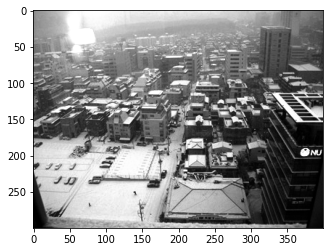

In [13]:
equ_im = np.zeros(image.shape)

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        equ_im[i][j] = equ_hist[image[i][j]]
plt.imshow(equ_im, cmap='gray')
plt.show()

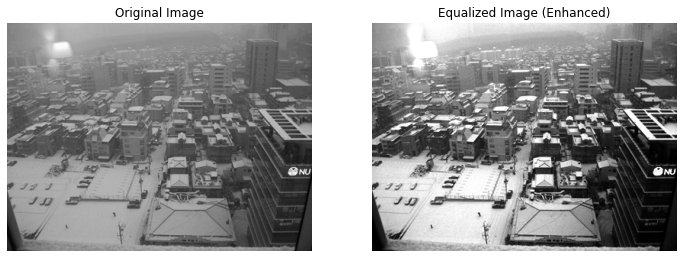

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(equ_im, cmap='gray')
plt.title('Equalized Image (Enhanced)')
plt.axis("off")
plt.show()

> Plotting the difference between the original and the equivalent Histogram

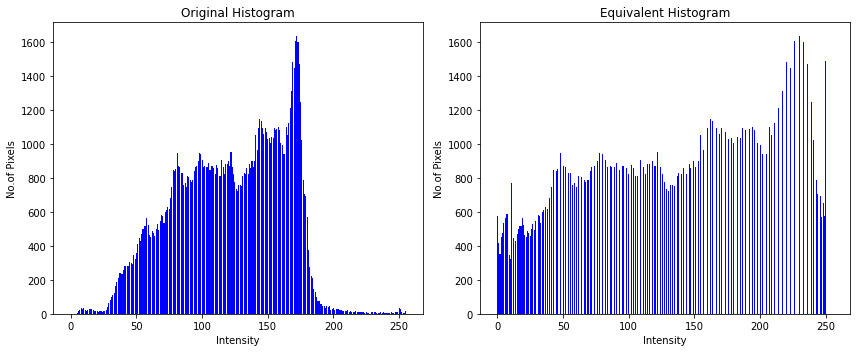

In [15]:
import matplotlib.pyplot as plt
import numpy as np
 
intensity_levels = np.arange(256)
equ_hist = calculate_histogram(equ_im)
# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))   
 
axes[0].bar(intensity_levels, histogram, color='blue')
axes[0].set_xlabel('Intensity')
axes[0].set_ylabel('No.of Pixels')
axes[0].set_title('Original Histogram')
 
axes[1].bar(intensity_levels, equ_hist, color='blue')
axes[1].set_xlabel('Intensity')
axes[1].set_ylabel('No.of Pixels')
axes[1].set_title('Equivalent Histogram')
plt.tight_layout()

# Display the plot
plt.show()


> Histogram Equalization for every picture

### <i> Histogram Matching </i>

> Importing the required libraries

```python

In [33]:
img_path = "D:\DIP_Lab\Lab_2\specfi\input_img2.png"
image = Image.open(img_path)
# image = np.asarray(image)
# image.shape

In [34]:
rimg_path = "D:\DIP_Lab\Lab_2\specfi\lena_ref1.jpg" 
rimage = Image.open(rimg_path)
# rimage = np.asarray(rimage)
# new_shape = (512,640,3)
# rimage = np.resize(rimage, new_shape)
# rimage.shape

In [35]:
image = np.array(image)
rimage = np.array(rimage)
print(f"{image.shape} {rimage.shape}")
#here we'll get the no. of channels i.e 3

(512, 640, 3) (822, 1200, 3)


### <i> Functions for Histogram Matching on the image</i>


> Calculating the histogram of the image

```python



#### Parameters:
- `tmpl_rounded`: An array of rounded values (e.g., quantiles) from a cumulative distribution function (CDF).
- `target`: The target value to find the nearest value greater than.

#### Functionality:
1. Calculates the difference between the rounded values and the target value.
2. Creates a mask to identify values less than or equal to -1 in the difference array.
3. If all values are masked (i.e., all values in `diff` are less than or equal to -1), it returns the index of the nearest value to the target.
4. Otherwise, it masks the difference array based on the mask.
5. Finds the index of the nearest value greater than the target in the masked difference array.
6. Returns the index of the nearest value greater than the target.

### Returns:
- `index`: The index of the nearest value greater than the target in the `tmpl_rounded` array.


In [25]:
import numpy as np
from PIL import Image

def _find_nearest_above(tmpl_rounded, target):
 
    diff = tmpl_rounded - target

    mask = np.ma.less_equal(diff, -1)
    
    if np.all(mask):
        c = np.abs(diff).argmin()
        return c

    masked_diff = np.ma.masked_array(diff, mask)
    return masked_diff.argmin()



>Matching Cumulative CDF

#### Parameters:
- `source`: The source image.
- `template`: The reference or template image.

#### Functionality:
1. Calculates unique values, counts, and cumulative sums for the source and template images:
    - `src_values`, `src_lookup`, `src_counts`: Unique values, lookup indices, and counts for the source image.
    - `tmpl_values`, `tmpl_counts`: Unique values and counts for the template image.
2. Computes normalized quantiles for each image using the cumulative sums of counts.
3. Rounds the quantiles to the nearest integer and scales to the range [0, 255].
4. Matches the quantiles of the source image to the closest quantiles in the template image:
    - Iterates over rounded quantiles of the source image.
    - Finds the nearest quantile in the template image using `_find_nearest_above` function.
5. Maps the matched values to the source image indices.
6. Reshapes the mapped values to the shape of the source image.
7. Returns:
    - `matched_values`: The matched image.
    - `source_stats`: A tuple containing the unique values, counts, and normalized quantiles of the source image.
    - `template_stats`: A tuple containing the unique values, counts, and normalized quantiles of the template image.

In [29]:
def _match_cumulative_cdf(source, template):
    
    src_values, src_lookup, src_counts = np.unique(source.reshape(-1), return_inverse=True, return_counts=True)
    tmpl_values, tmpl_counts = np.unique(template.reshape(-1), return_counts=True)
    
    src_quantiles = np.cumsum(src_counts) / source.size
    tmpl_quantiles = np.cumsum(tmpl_counts) / template.size
    
    src_rounded = np.around(src_quantiles * 255)
    tmpl_rounded = np.around(tmpl_quantiles * 255)
    
    mapped_values = []
    for data in src_rounded:
        mapped_values.append(_find_nearest_above(tmpl_rounded, data))

    mapped_values = np.array(mapped_values, dtype="uint8")
    
    return mapped_values[src_lookup].reshape(source.shape), (src_values, src_counts, src_quantiles), (tmpl_values, tmpl_counts, tmpl_quantiles)



> Match Histogram Function


#### Parameters:
- `image`: Input image.
- `reference`: Reference image.
- `channel_axis`: Optional parameter indicating the axis of the color channel. Default is None, assuming grayscale images.

#### Functionality:
1. Converts `image` and `reference` into NumPy arrays using `np.asarray()`.
2. Checks if the number of dimensions (ndim) of the input images `image` and `reference` are the same. Raises a ValueError if they are not.
3. If `channel_axis` is not None (indicating multi-channel images like RGB), performs histogram matching for each color channel separately:
    - Initializes dictionaries (`source_cdf`, `source_hist`, `reference_cdf`, `reference_hist`) to store CDFs and histograms for each color channel.
    - Calls `_match_cumulative_cdf` function for each channel.
    - Updates `matched` array with matched channel.
    - Stores CDFs and histograms for each channel in respective dictionaries.
4. If `channel_axis` is None (indicating grayscale images), performs histogram matching directly without considering color channels.
5. Returns:
    - `matched`: The matched image.
    - `source_stats`: A tuple containing the CDF and histogram of the source image.
    - `ref_stats`: A tuple containing the CDF and histogram of the reference image.

In [54]:
def matchHistogram(image, reference, channel_axis=None):
    
    image = np.asarray(image)
    reference = np.asarray(reference)
    
    
    if image.ndim != reference.ndim:
        raise ValueError(f"Both the images should have same number of channels. Image has {image.ndim} channels and reference has {reference.ndim} channels")
    
    if channel_axis is not None:
        
        source_cdf = {
            "R": None,
            "G": None,
            "B": None
        }
        source_hist = {
            "R": None,
            "G": None,
            "B": None
        }
        
        reference_cdf = {
            "R": None,
            "G": None,
            "B": None
        }
        
        reference_hist = {
            "R": None,
            "G": None,
            "B": None   
        }
        
        if image.shape[channel_axis] != reference.shape[channel_axis]:
            raise ValueError(f"The number of channels in the image and reference should be same. Image has {image.shape[channel_axis]} channels and reference has {reference.shape[channel_axis]} channels")
        
        matched = np.zeros_like(image)
        
        for channel in range(image.shape[-1]):
            matched_channel, source, template = _match_cumulative_cdf(image[..., channel], reference[..., channel])  
            matched[..., channel] = matched_channel
            src_values, src_counts, src_quantiles = source
            tmpl_values, tmpl_counts, tmpl_quantiles = template
            if channel == 0:
                source_cdf["R"] = src_quantiles
                reference_cdf["R"] = tmpl_quantiles
                
                zip_source = zip(src_values, src_counts)
                source_hist["R"] = dict(zip_source)
                
                zip_template = zip(tmpl_values, tmpl_counts)
                reference_hist["R"] = dict(zip_template)
            elif channel == 1:
                source_cdf["G"] = src_quantiles
                reference_cdf["G"] = tmpl_quantiles
                
                zip_source = zip(src_values, src_counts)
                source_hist["G"] = dict(zip_source)
                
                zip_template = zip(tmpl_values, tmpl_counts)
                reference_hist["G"] = dict(zip_template)
                
            else:
                source_cdf["B"] = src_quantiles
                reference_cdf["B"] = tmpl_quantiles
                
                zip_source = zip(src_values, src_counts)
                source_hist["B"] = dict(zip_source)
                
                zip_template = zip(tmpl_values, tmpl_counts)
                reference_hist["B"] = dict(zip_template)
        
        return matched, (source_cdf, source_hist), (reference_cdf, reference_hist)
    else:
        matched, source, template = _match_cumulative_cdf(image, reference)
        
        src_values, src_counts, source_cdf = source
        tmpl_values, tmpl_counts, reference_cdf = template
        
        zip_source = zip(src_values, src_counts)
        source_hist = dict(zip_source)
        
        zip_template = zip(tmpl_values, tmpl_counts)
        reference_hist = dict(zip_template)
        
        return matched, (source_cdf, source_hist), (reference_cdf, reference_hist)

> PLotting the histogram , CDF and RGB for the images

In [26]:
def plotImages(source, reference, output):
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.imshow(source, cmap='gray')
    plt.title('Input Image')
    plt.axis("off")
    plt.subplot(132)
    plt.imshow(reference, cmap='gray')
    plt.title('Reference Image')
    plt.axis("off")
    plt.subplot(133)
    plt.imshow(output, cmap='gray')
    plt.title('Output Image')
    plt.axis("off")
    plt.tight_layout()
    plt.show()


> Plotting Channel Histograms

### Parameters:
- `img`: The input image whose channel histograms will be plotted.
- `reference_img`: The reference image whose channel histograms will be plotted alongside the input image histograms.

### Functionality:
1. **Convert Images to RGB**:
   - Both `img` and `reference_img` are converted to RGB format if they are not already in RGB. This is done to ensure consistency in handling the channels.

2. **Split Channels**:
   - The input image (`img`) and the reference image (`reference_img`) are split into their respective red, green, and blue channels using the `split()` method.

3. **Plotting Histograms**:
   - A subplot grid of size 3x2 is created for plotting the histograms of red, green, and blue channels for both the input and reference images.

4. **Iterating Over Channels**:
   - For each channel (red, green, and blue), the function iterates over them along with their corresponding channels from the reference image. It also iterates over the colors 'red', 'green', and 'blue'.

5. **Plot Histograms**:
   - Inside the loop, histograms of the current channel from both the input image and the reference image are plotted on the corresponding subplot.

6. **Setting Titles and Limits**:
   - Titles are set for each subplot indicating whether it's the input or reference image histogram and which channel it represents (red, green, or blue). The x-axis limits are set to range from 0 to 255 to cover the full intensity range of the image.

7. **Displaying the Plot**:
   - Finally, the layout is adjusted to prevent overlapping of subplots, and the plot is displayed.


In [76]:
def plot_channel_histograms(img, reference_img):
    img = img.convert("RGB")
    reference_img = reference_img.convert("RGB")
    r, g, b = img.split()
    reference_r, reference_g, reference_b = reference_img.split()
    fig, axes = plt.subplots(3, 2, figsize=(12, 8))
    for i, (channel, reference_channel, color) in enumerate(zip([r, g, b], [reference_r, reference_g, reference_b], ['red', 'green', 'blue'])):
        ax = axes[i][0]
        ax.hist(np.array(channel).ravel(), bins=256, color=color)
        ax.set_title(f'{color.capitalize()} Channel Histogram (Input)')
        ax.set_xlim(0, 255)
        ax.grid(True)
        ax = axes[i][1]
        ax.hist(np.array(reference_channel).ravel(), bins=256, color=color)
        ax.set_title(f'{color.capitalize()} Channel Histogram (Reference)')
        ax.set_xlim(0, 255)
        ax.grid(True)

    plt.tight_layout()
    plt.show()

In [28]:
def plotCDF(cdf_values, plot_title="CDF"):
 
    plt.figure(figsize=(15, 5))
    plt.subplot(131)
    plt.plot(cdf_values["R"], color='r')
    plt.title('Red Channel CDF')
    plt.subplot(132)
    plt.plot(cdf_values["G"], color='g')
    plt.title('Green Channel CDF')
    plt.subplot(133)
    plt.plot(cdf_values["B"], color='b')
    plt.title('Blue Channel CDF')
    plt.suptitle(plot_title)
    plt.show()

In [44]:
imgg = Image.open(f"D:\DIP_Lab\Lab_2\specfi\input_img4.png")
reff = Image.open(f"D:\DIP_Lab\Lab_2\specfi\lena_ref1.jpg")

In [60]:
channel_axis = 2
# we can use image and rimage
new_img, source_stats, ref_stats = matchHistogram(imgg.convert("RGB"), reff, channel_axis=2)
source_cdf, source_hist = source_stats

ref_cdf, ref_hist = ref_stats

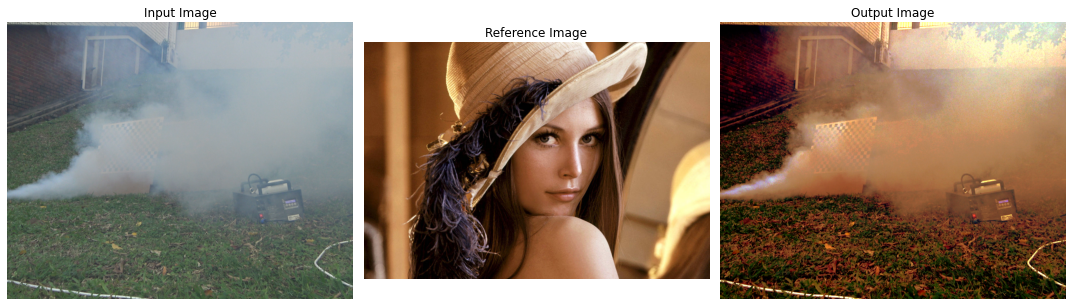

In [61]:
plotImages(imgg, reff, new_img)

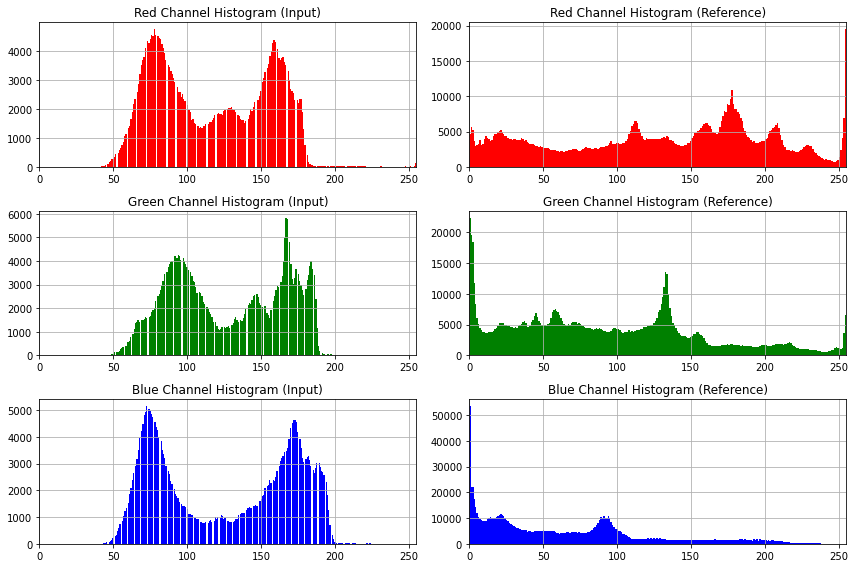

In [75]:
plot_channel_histograms(imgg, reff)

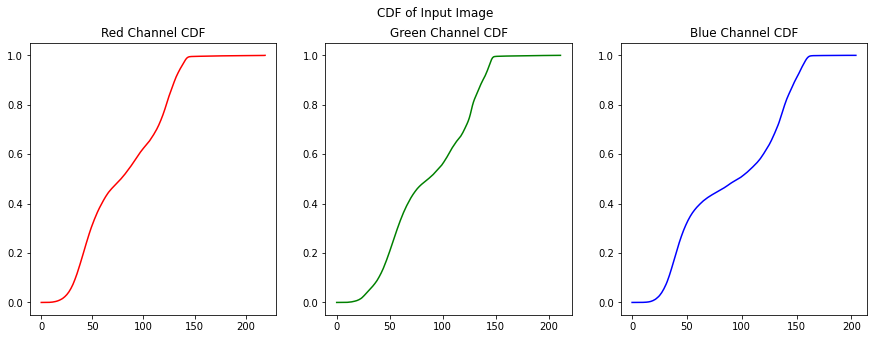

In [64]:
plotCDF(source_cdf, plot_title="CDF of Input Image")

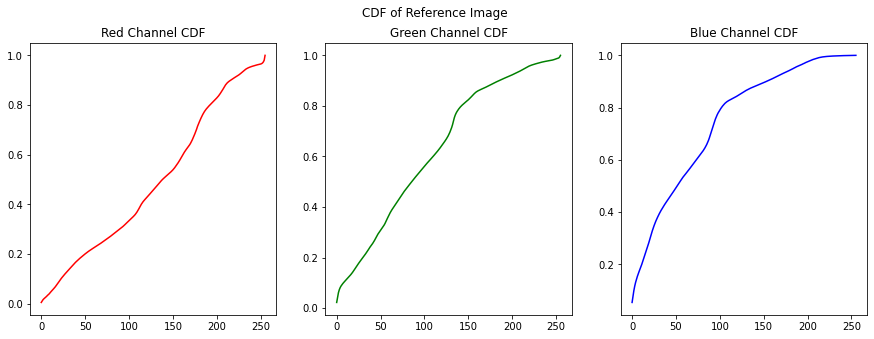

In [65]:
plotCDF(ref_cdf, plot_title="CDF of Reference Image")

> Plotting every other image present 

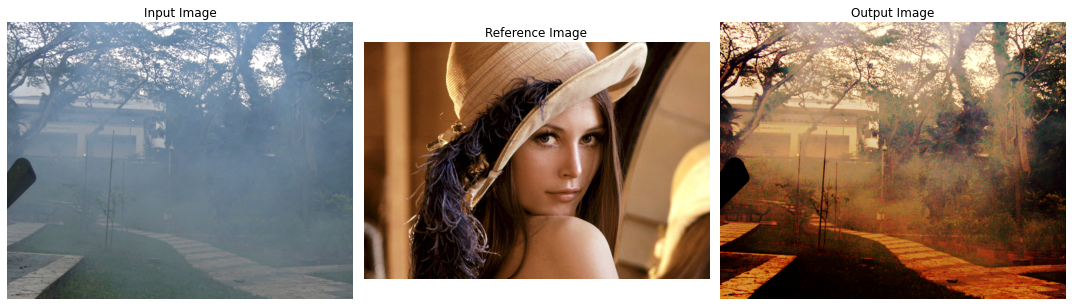

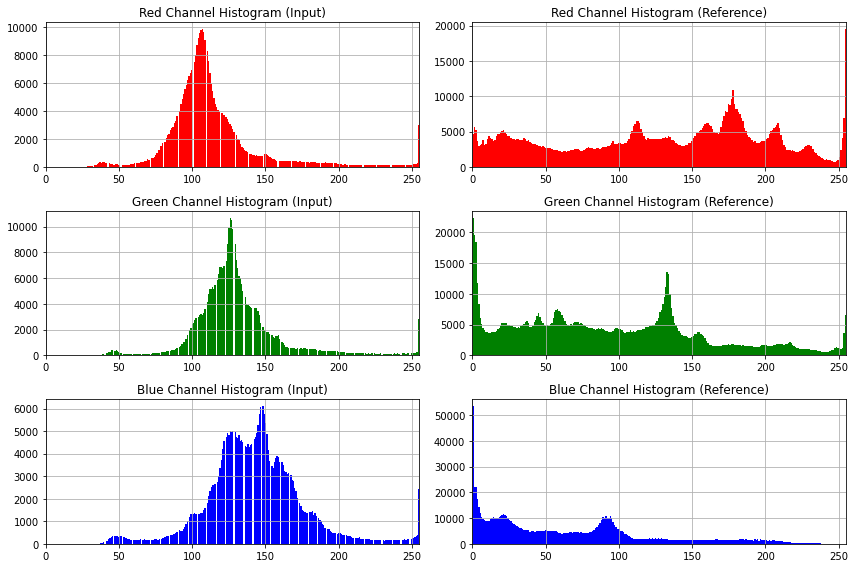

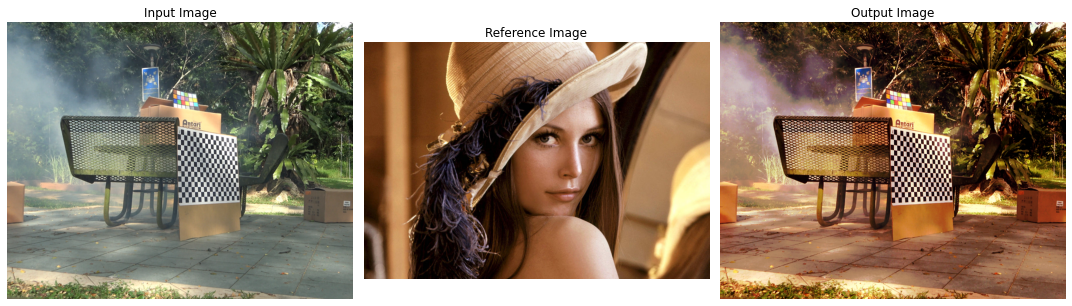

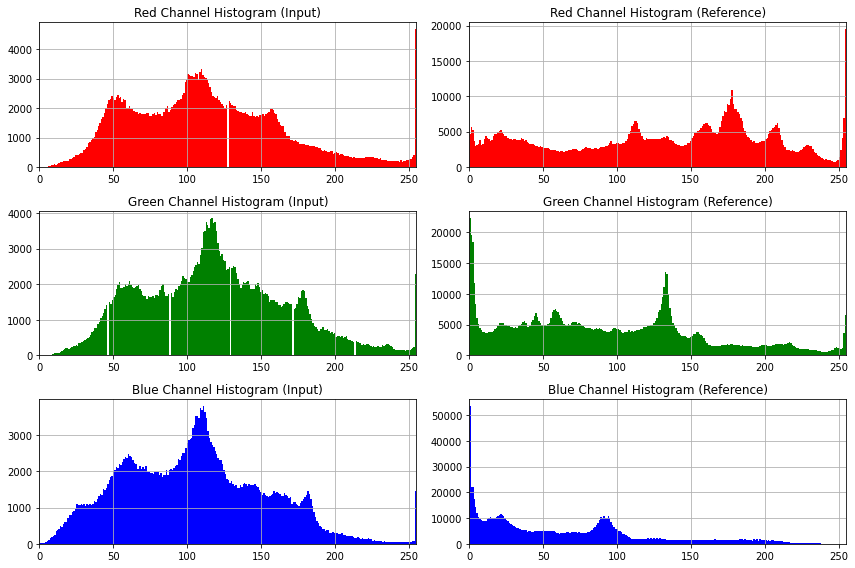

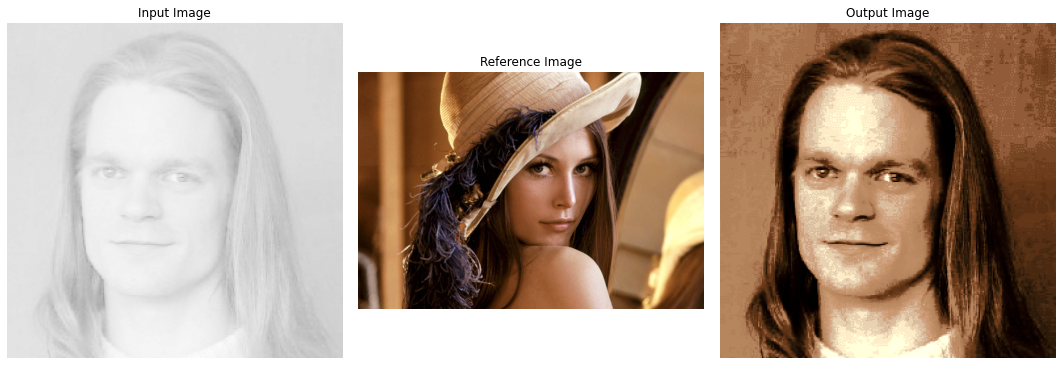

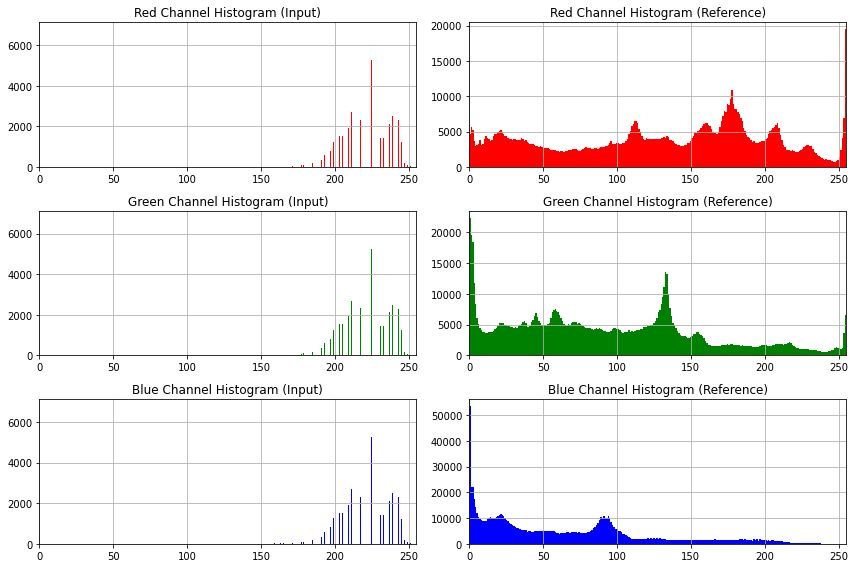

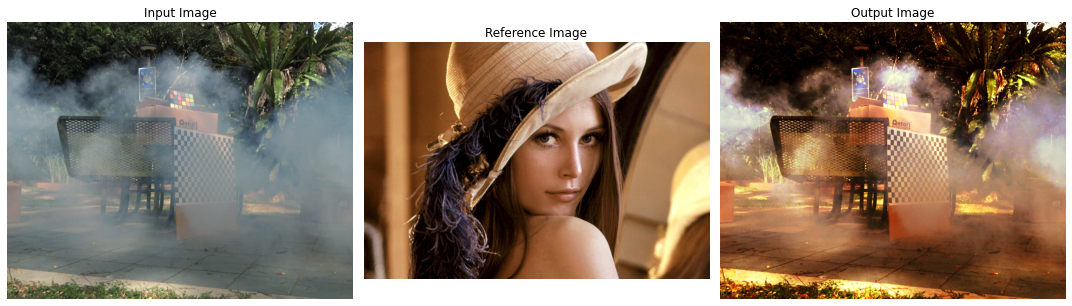

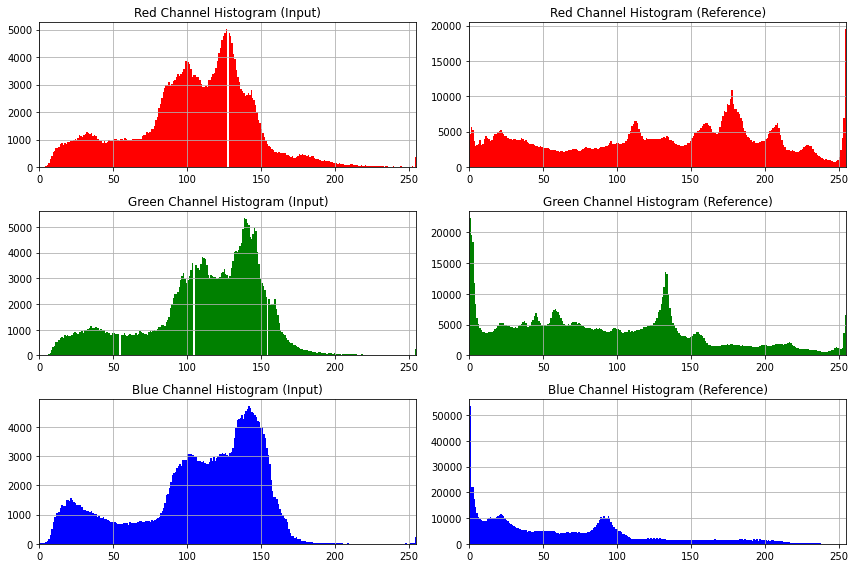

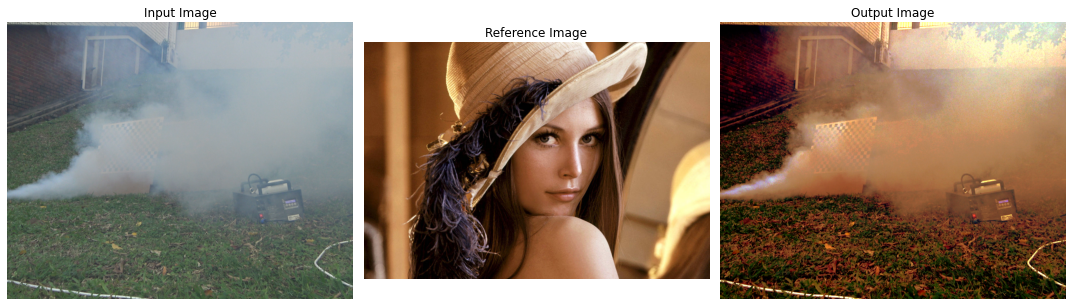

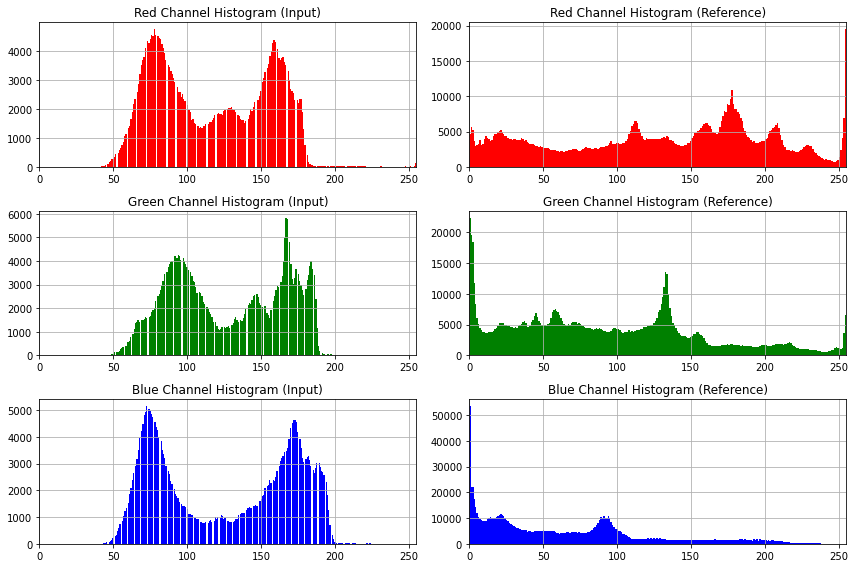

In [74]:
image_path = 'D:\DIP_Lab\Lab_2\specfi'
input_images = ["input_img3.png","input_img5.png","input_img1.jpg","input_img2.png","input_img4.png"]
reference_images = ["lena_ref1.jpg"]

original_images = [Image.open(f"{image_path}/{img}") for img in input_images]
reference_images = [Image.open(f"{image_path}/{img}") for img in reference_images]

matched_images = []
src_cdf=[]
src_hist=[]
for img in original_images:
    for ref_img in reference_images:
        matched_image, (source_cdf, source_hist), (reference_cdf, reference_hist) = matchHistogram(img.convert("RGB"), ref_img, channel_axis=-1)
        plotImages(img, ref_img, matched_image)
        plot_channel_histograms(img, ref_img)